In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
ipl_data = pd.read_csv('./matches.csv')
ipl_data

ipl_data['Date'] = pd.to_datetime(ipl_data["date"],format="%d/%m/%y",errors="coerce")
mask = ipl_data["Date"].isna()
ipl_data.loc[mask,"Date"] = pd.to_datetime(ipl_data.loc[mask,"date"],format="%d/%m/%Y",errors="coerce")
ipl_data['year'] = pd.DatetimeIndex(ipl_data['Date']).year

data = {
    "team": [] ,
    "played":[]
}

for matches in ipl_data["team1"].unique():
   played_matches = len( ipl_data[ (ipl_data["team1"] == matches) | (ipl_data["team2"] == matches) ] )
   data["team"].append(matches)
   data["played"].append(played_matches)

df = pd.DataFrame(data)   
df

,team,played
0,Sunrisers Hyderabad,76
1,Mumbai Indians,157
2,Gujarat Lions,30
3,Rising Pune Supergiant,16
4,Royal Challengers Bangalore,152
5,Kolkata Knight Riders,148
6,Delhi Daredevils,147
7,Kings XI Punjab,148
8,Chennai Super Kings,131
9,Rajasthan Royals,118


In [20]:
ipl_data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,Date,year
0,1,2017,Hyderabad,5/4/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,2017-04-05,2017
1,2,2017,Pune,6/4/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2017-04-06,2017
2,3,2017,Rajkot,7/4/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,2017-04-07,2017
3,4,2017,Indore,8/4/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,2017-04-08,2017
4,5,2017,Bangalore,8/4/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,2017-04-08,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,22/05/16,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN,2016-05-22,2016
632,633,2016,Bangalore,24/05/16,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN,2016-05-24,2016
633,634,2016,Delhi,25/05/16,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN,2016-05-25,2016
634,635,2016,Delhi,27/05/16,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN,2016-05-27,2016


In [21]:
ipl_data_winner_yearly = ipl_data.groupby(['year','winner'])[['year']].count().rename(columns={'year':'win'}).reset_index()
ipl_data_winner_yearly

,year,winner,win
0,2008,Chennai Super Kings,9
1,2008,Deccan Chargers,2
2,2008,Delhi Daredevils,7
3,2008,Kings XI Punjab,10
4,2008,Kolkata Knight Riders,6
...,...,...,...
79,2017,Kolkata Knight Riders,9
80,2017,Mumbai Indians,12
81,2017,Rising Pune Supergiant,10
82,2017,Royal Challengers Bangalore,3


In [22]:
teams_total_matches = pd.concat([(ipl_data.groupby(['year','team1']).size().reset_index(name='matches')).rename(columns={'team1':'team'}) , 
(ipl_data.groupby(['year','team2']).size().reset_index(name='matches')).rename(columns={'team2':'team'}) ]).groupby(['year','team']).sum().reset_index()

teams_total_matches

,year,team,matches
0,2008,Chennai Super Kings,16
1,2008,Deccan Chargers,14
2,2008,Delhi Daredevils,14
3,2008,Kings XI Punjab,15
4,2008,Kolkata Knight Riders,13
...,...,...,...
79,2017,Kolkata Knight Riders,16
80,2017,Mumbai Indians,17
81,2017,Rising Pune Supergiant,16
82,2017,Royal Challengers Bangalore,13


In [23]:
team_stats = pd.merge(teams_total_matches,ipl_data_winner_yearly,left_on=['year','team'],right_on=['year','winner'],how='left')
team_stats.drop(columns='winner',inplace=True)
team_stats

,year,team,matches,win
0,2008,Chennai Super Kings,16,9
1,2008,Deccan Chargers,14,2
2,2008,Delhi Daredevils,14,7
3,2008,Kings XI Punjab,15,10
4,2008,Kolkata Knight Riders,13,6
...,...,...,...,...
79,2017,Kolkata Knight Riders,16,9
80,2017,Mumbai Indians,17,12
81,2017,Rising Pune Supergiant,16,10
82,2017,Royal Challengers Bangalore,13,3


In [24]:
ipl_data_winner_yearly["losses"] =  team_stats["matches"] - team_stats["win"] 
ipl_data_winner_yearly

,year,winner,win,losses
0,2008,Chennai Super Kings,9,7
1,2008,Deccan Chargers,2,12
2,2008,Delhi Daredevils,7,7
3,2008,Kings XI Punjab,10,5
4,2008,Kolkata Knight Riders,6,7
...,...,...,...,...
79,2017,Kolkata Knight Riders,9,7
80,2017,Mumbai Indians,12,5
81,2017,Rising Pune Supergiant,10,6
82,2017,Royal Challengers Bangalore,3,10


In [25]:
threshold = 10

team_stats["prob"] = team_stats["win"] > 10
team_stats

,year,team,matches,win,prob
0,2008,Chennai Super Kings,16,9,False
1,2008,Deccan Chargers,14,2,False
2,2008,Delhi Daredevils,14,7,False
3,2008,Kings XI Punjab,15,10,False
4,2008,Kolkata Knight Riders,13,6,False
...,...,...,...,...,...
79,2017,Kolkata Knight Riders,16,9,False
80,2017,Mumbai Indians,17,12,True
81,2017,Rising Pune Supergiant,16,10,False
82,2017,Royal Challengers Bangalore,13,3,False


<Axes: xlabel='year', ylabel='win'>

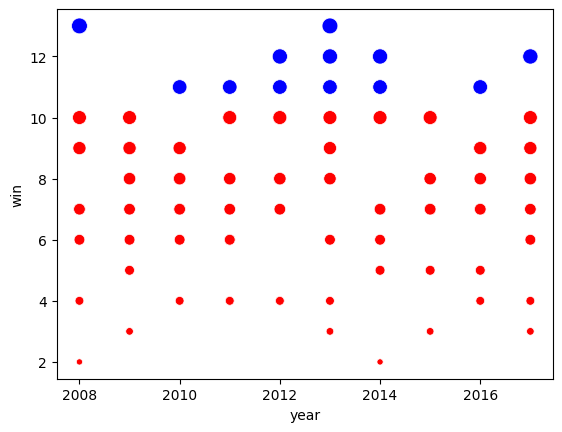

In [30]:
colors = {
    True : "blue" , 
    False : "red"
}
col = []
for i in team_stats.prob :
    col.append(colors[i])

sns.scatterplot(x=team_stats.year,y=team_stats.win,s=team_stats["win"] *10 , c = col)

**It shows the teams with better wins with bigger spheres that shows their dominance in that particular year**

In [38]:
all_teams = []
for teams in ipl_data['team1'].unique() :
    all_teams.append(teams)
all_teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Gujarat Lions',
 'Rising Pune Supergiant',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Delhi Daredevils',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Deccan Chargers',
 'Kochi Tuskers Kerala',
 'Pune Warriors',
 'Rising Pune Supergiants']

In [34]:
import matplotlib.pyplot as plt


ipl_data['wins'] = 1

colors1 = {
    True :'blue',
    False:'red'
}

fig, axes = plt.subplots( len(ipl_data['team1'].unique()) , len(ipl_data['year'].unique()) , figsize=(200, 100) , sharex=True , sharey=True )
# i , j
for i , team in enumerate(ipl_data["team1"].unique()) : 
    
    for j ,year in enumerate(ipl_data["year"].unique()) : 
        list_of_matches = ipl_data[ ((ipl_data['team1'] == team) | (ipl_data['team2'] == team)) & (ipl_data['year'] == year)]
        colors2 = []
        win_array = list_of_matches["winner"] == team
        for l in win_array :
            colors2.append(colors1[l])
        
        # axes[i , j].plot(list_of_matches.Date , list_of_matches.wins , 'o--')
        axes[i , j].scatter(x=list_of_matches.Date,y=list_of_matches.wins,c=colors2 )

In [36]:
ipl_teams_history = {
    'year' : [],
    'team' : [],
    'total_wins' : []
}

for teams in ipl_data['team1'].unique():
    for years in ipl_data['year'].unique():
        ipl_teams_history['team'].append(teams)
        ipl_teams_history['year'].append(years)
        temporary_data = ipl_data[ (ipl_data['winner'] == teams) & (ipl_data['year'] == years) ]
        ipl_teams_history['total_wins'].append(len(temporary_data))

ipl_teams_history = pd.DataFrame(ipl_teams_history)

<Axes: xlabel='year', ylabel='team'>

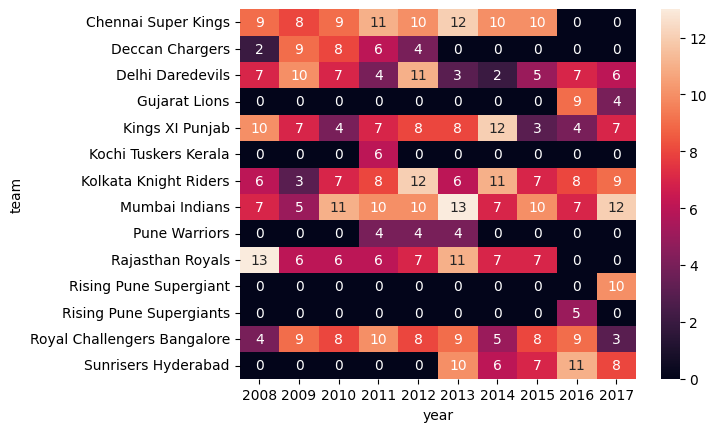

In [37]:
heatmap_pivot_table = ipl_teams_history.pivot(index='team',columns='year',values='total_wins')

sns.heatmap(heatmap_pivot_table,annot=True)

*Above Heatmap shows the number of wins by different teams in different years in compact cell*

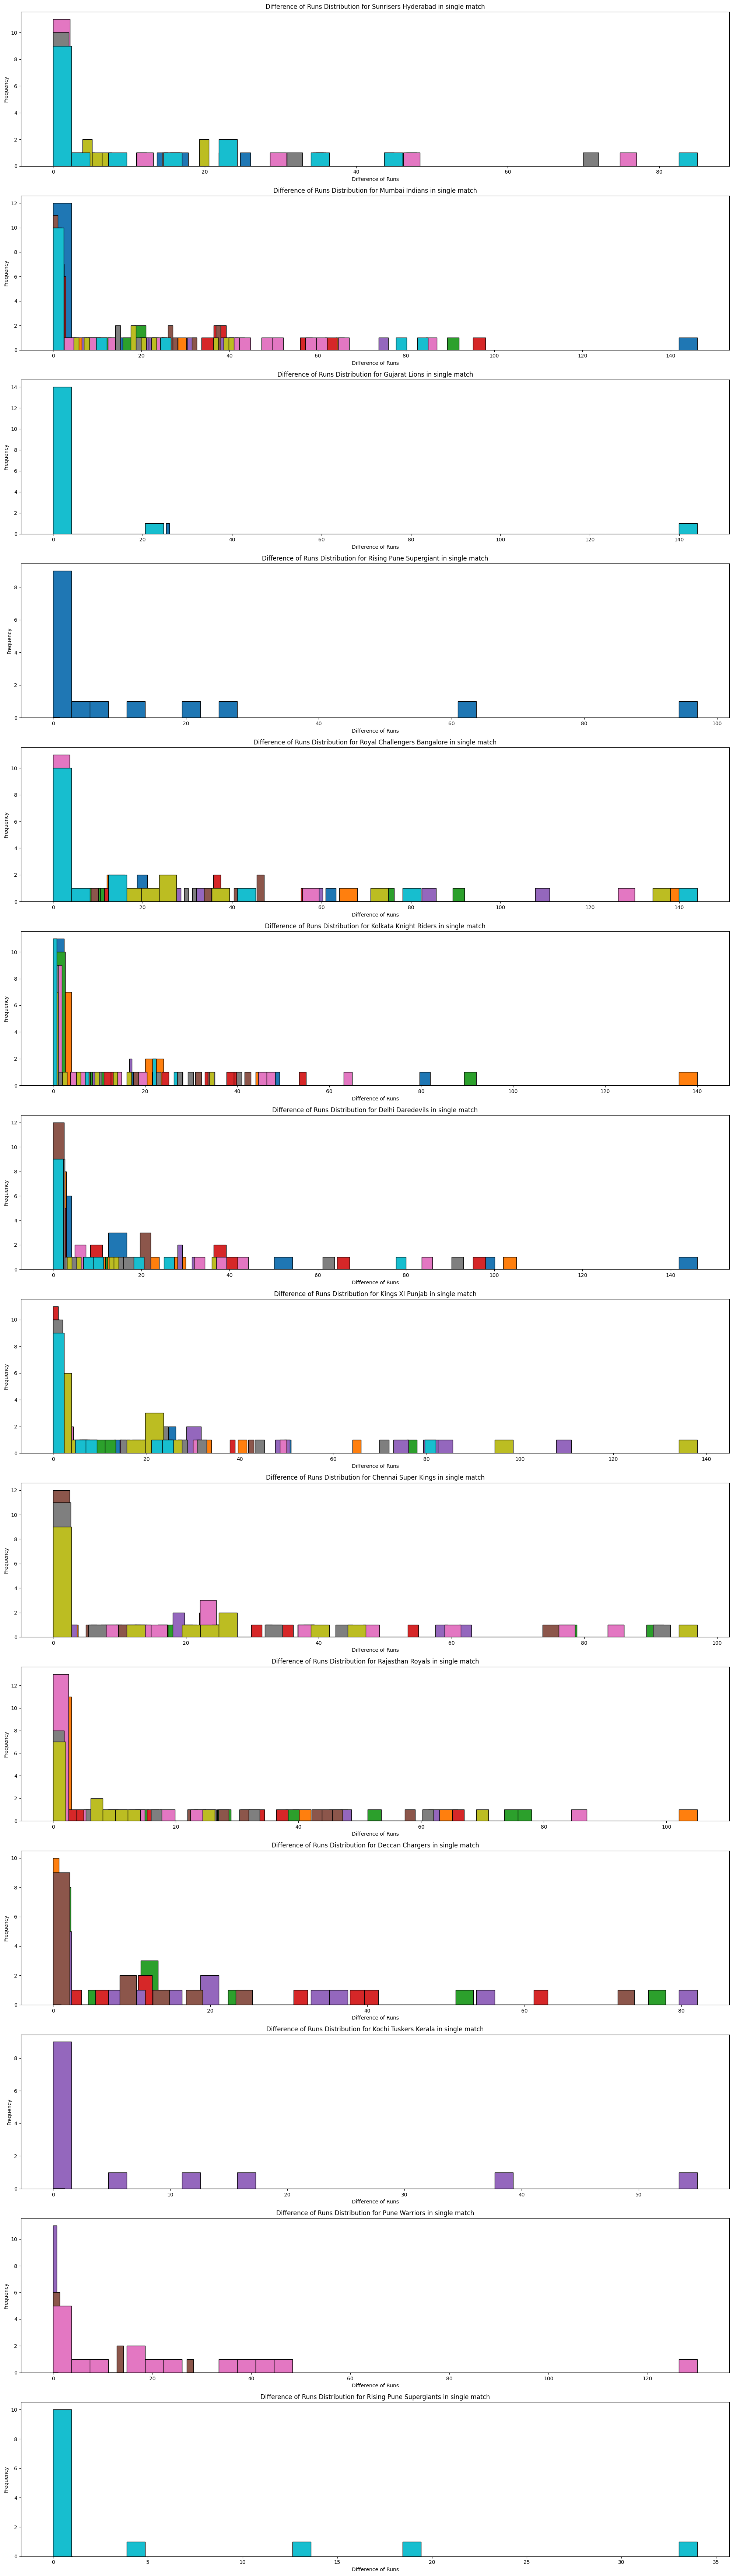

In [44]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(all_teams), 1, figsize=(20, len(all_teams) * 5))

for i, teams in enumerate(all_teams):
    for j, years in enumerate(ipl_data['year'].unique()):
        temp_data = ipl_data[( (ipl_data['team1'] == teams) | (ipl_data['team2'] == teams)) & (ipl_data['year'] == years)]
        axes[i].hist(temp_data.win_by_runs, bins=35, edgecolor='black')
        axes[i].set_title(f'Difference of Runs Distribution for {teams} in single match')
        axes[i].set_xlabel('Difference of Runs')
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

*Above histogram shows the difference of runs of every team which shows by what margin is a team losing every year*

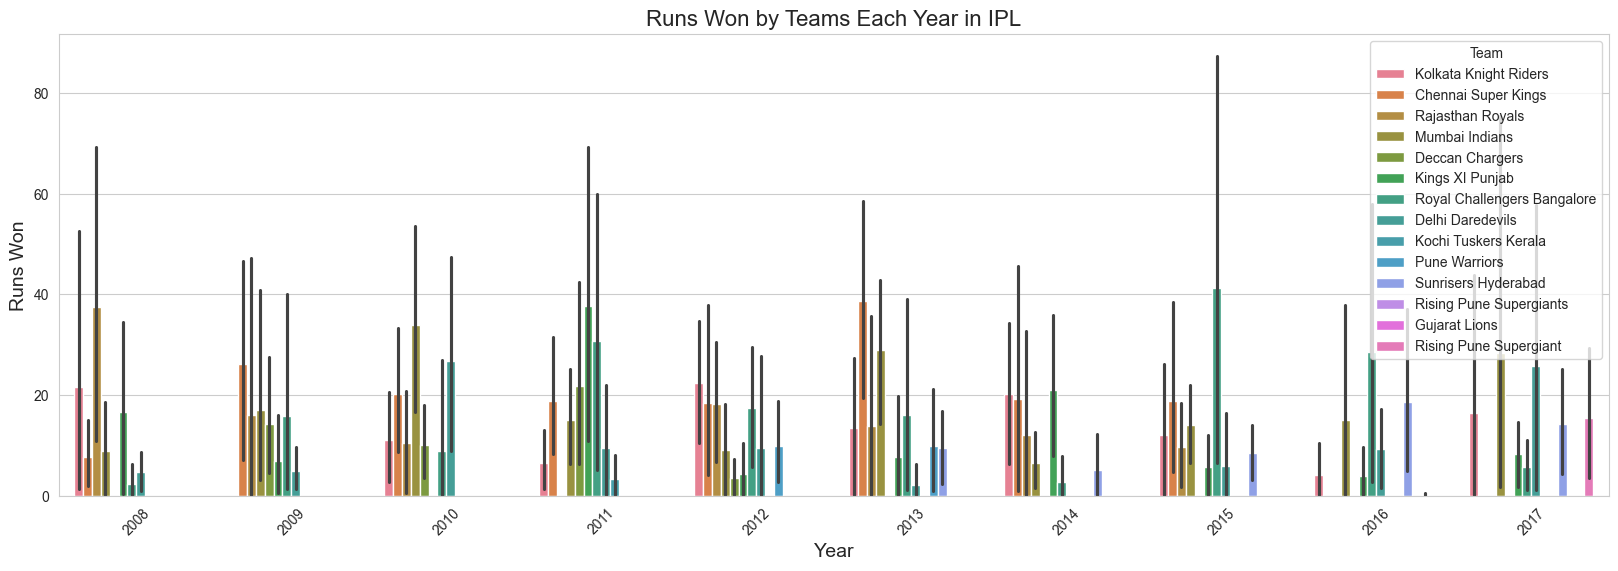

In [47]:
# Set the style and color palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create the barplot
plt.figure(figsize=(20, 6))
barplot = sns.barplot(x='year', y='win_by_runs', hue='team1', data=ipl_data)

# Add title and labels
plt.title('Runs Won by Teams Each Year in IPL', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Runs Won', fontsize=14)
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Team', loc='upper right')

# Show the plot
plt.show()

*Above barplot shows difference of runs in a match on an average for each and every team for each year*

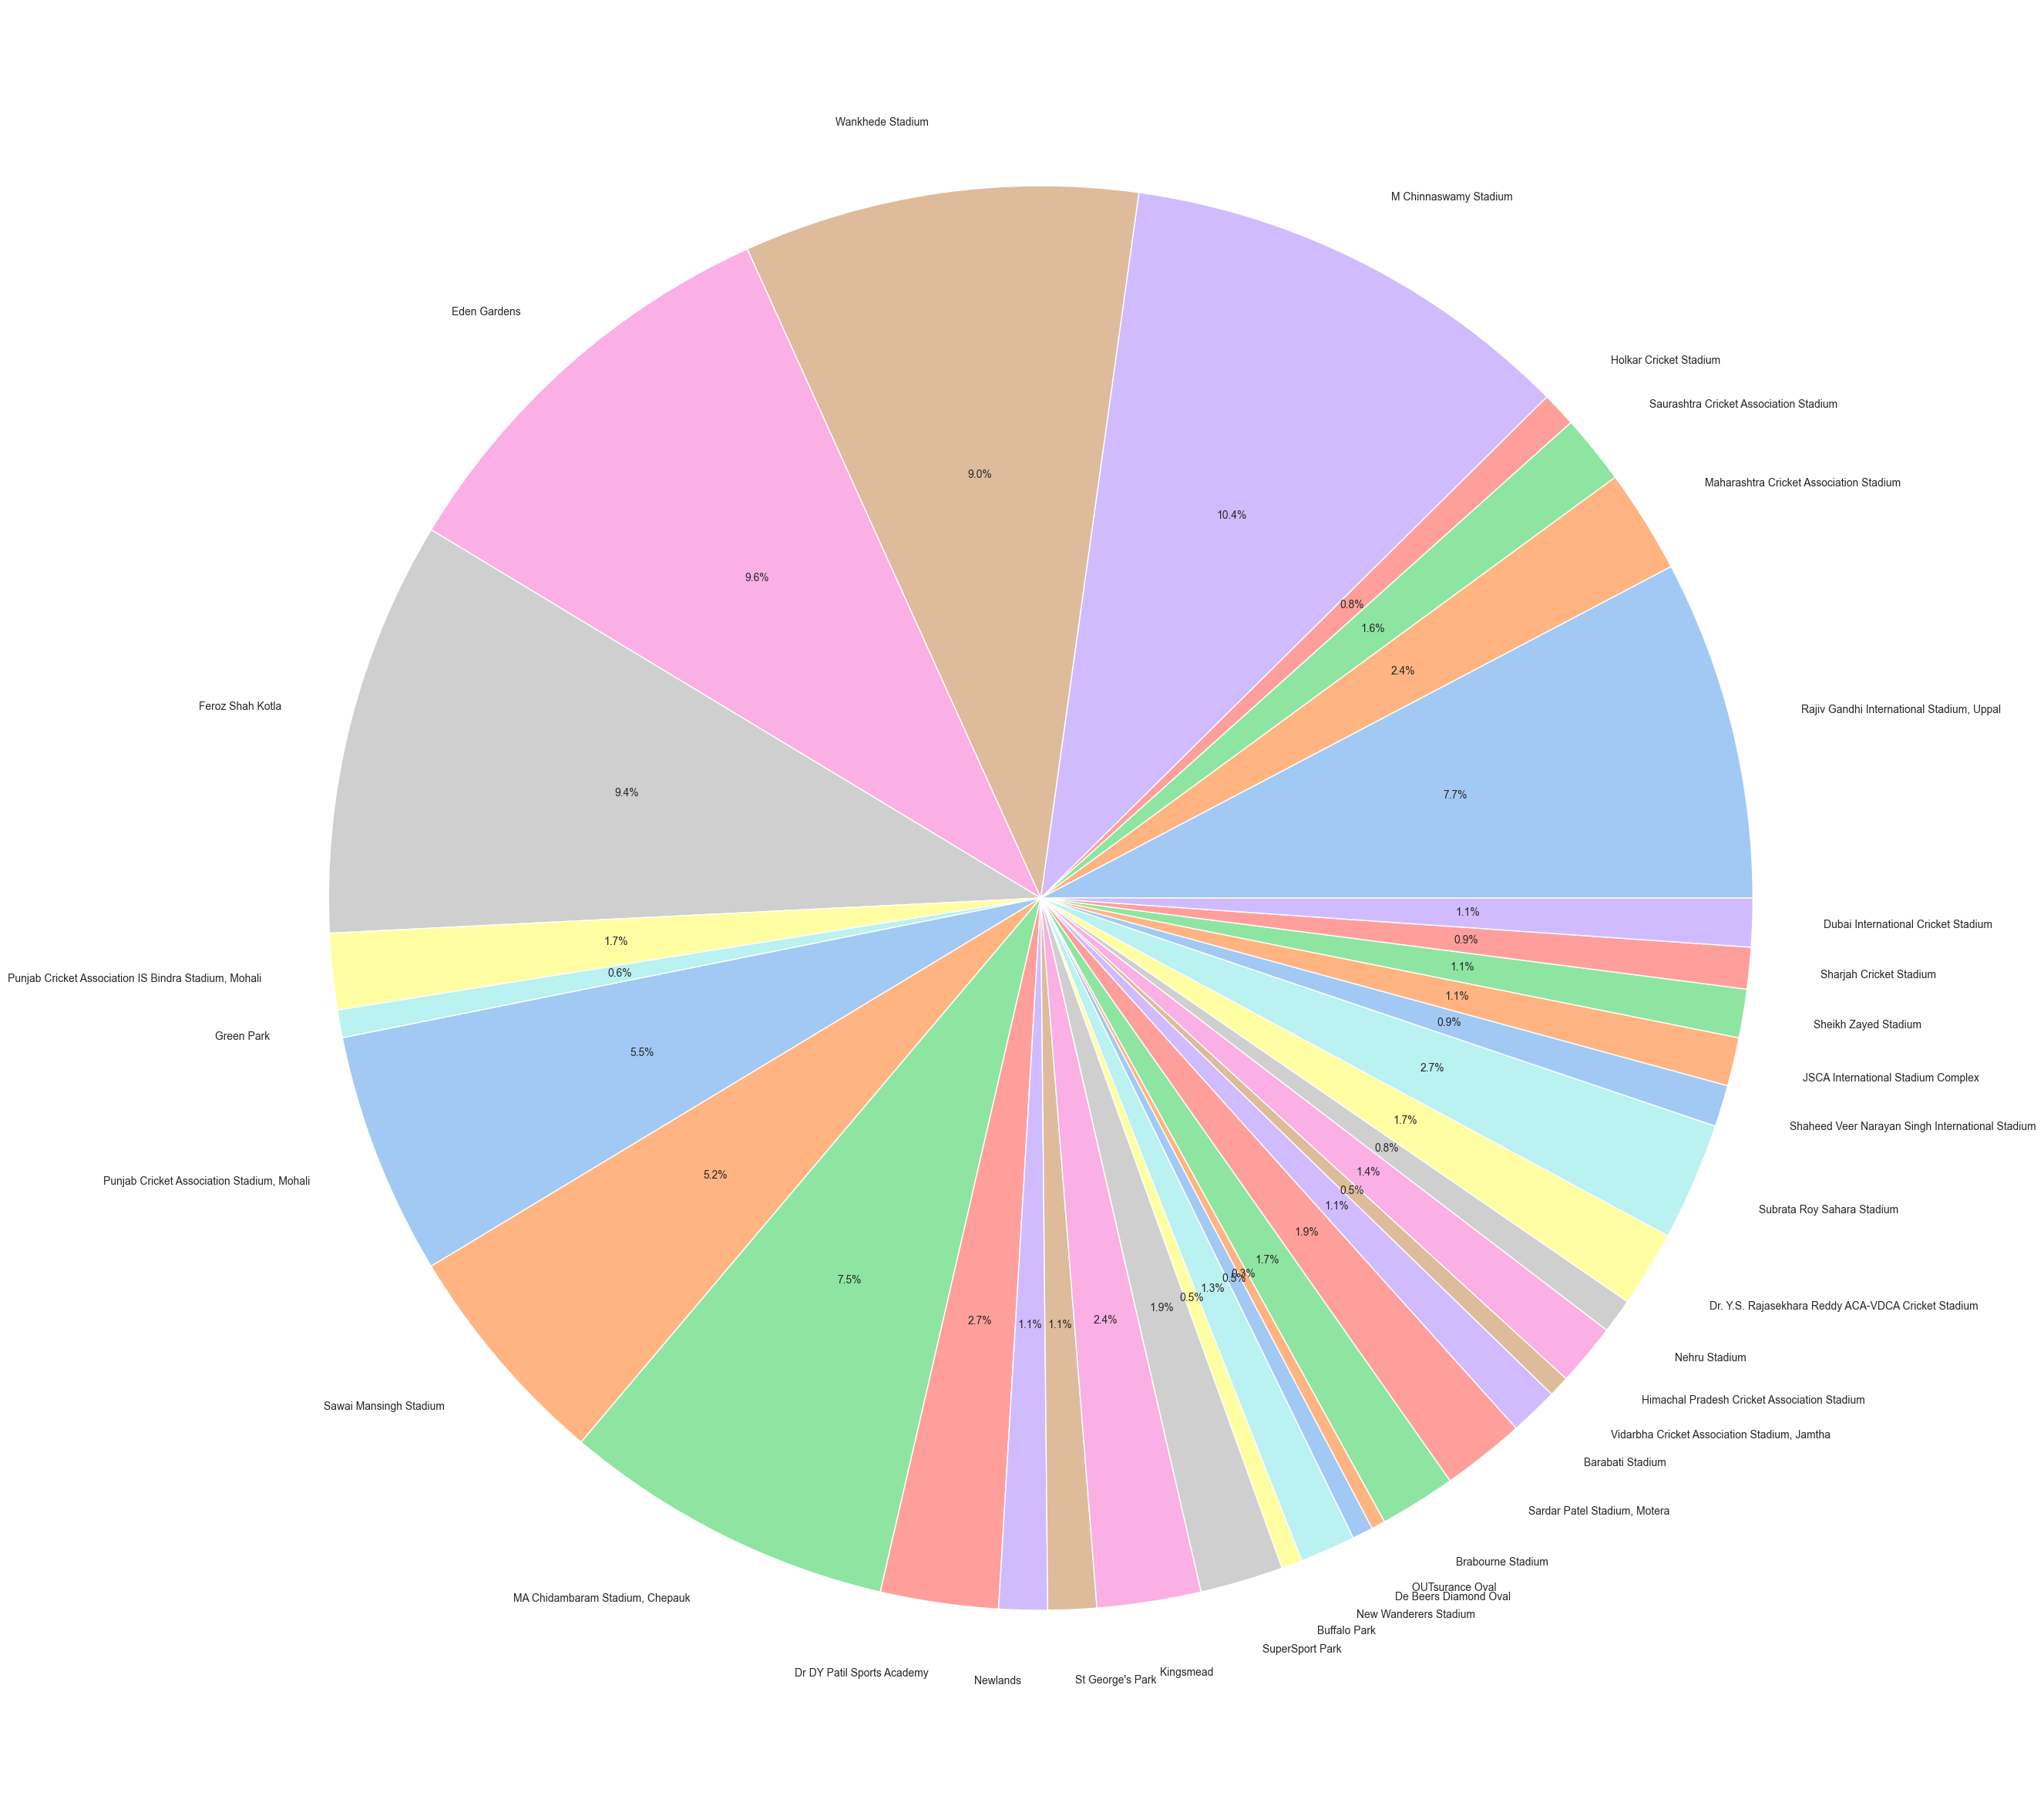

In [48]:
selected_data = ipl_data['venue'].unique()
venues_history = {
    'venue' : [],
    'no_of_matches' : []
}
for venues in selected_data:
    venues_history['venue'].append(venues)
    matches_played = len(ipl_data[ipl_data['venue'] == venues])
    venues_history['no_of_matches'].append(matches_played)

venues_history = pd.DataFrame(venues_history)
venues_history

plt.figure(figsize=(50,30))
plt.pie(venues_history.no_of_matches,labels=venues_history.venue,autopct='%1.1f%%') 
plt.show()

*Above piechart shows the number of matches being played in a stadium and stadiums with better area depicts that the most number of matches being played in that stadium*

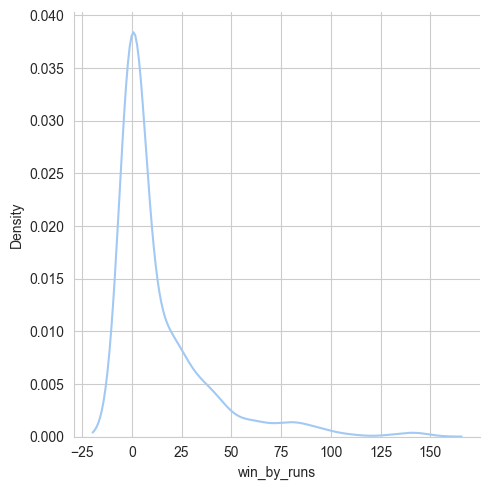

In [49]:
sns.displot(ipl_data , x = "win_by_runs" , kind="kde"   )

*This plot shows the probability of a team winning by 'X' amount of runs*

np.float64(1.5443768606456985)

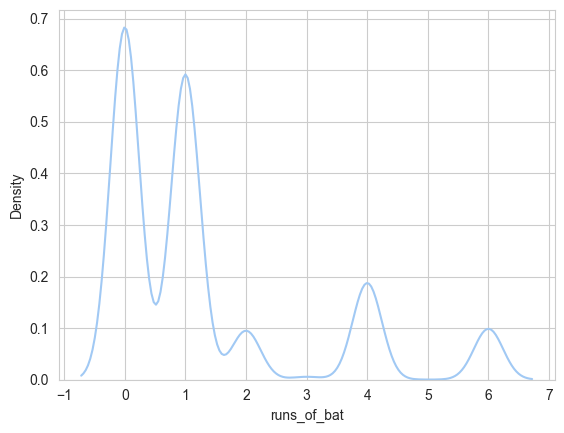

In [51]:
ipl_2022_data = pd.read_csv('./ipl_2022_deliveries.csv')
sns.kdeplot(ipl_2022_data.runs_of_bat)
ipl_2022_data.runs_of_bat.skew()

#### Inference : this graph indicates what is probability of hitting 1 run or 2 run or 3 run or 4 run or 5 run or 6 run
#### It also indiactes that there is very minimal chances of 5 runs getting scored 

np.float64(-0.3474524826305787)

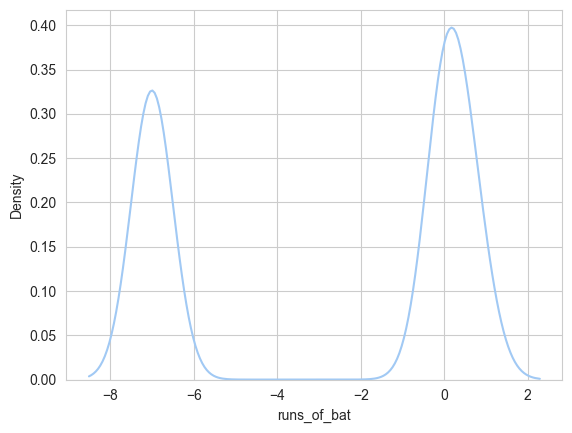

In [54]:
newvalue = np.log10(ipl_2022_data.runs_of_bat+0.0000001)
sns.kdeplot(newvalue)
skewness = newvalue.skew()
skewness

### It is just an example to show how we can skew a given data by doing log transformation

<Axes: >

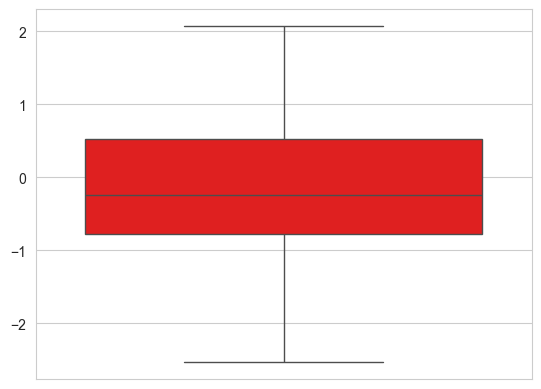

In [63]:
import numpy as np 
normalpoints = np.random.randn(100)
normalpoints
new_data = np.log2(ipl_data["win_by_runs"]+ 00000.1)

sns.boxplot(normalpoints  , color="red")

### This shows that points are normal so the std deviation will be near 1 and mean 0 so all the points are lying in between 25 to 75 percentile region and there is no point below 25 or after 75 percentile region and also there are no outliers

<Axes: xlabel='win_by_runs', ylabel='Density'>

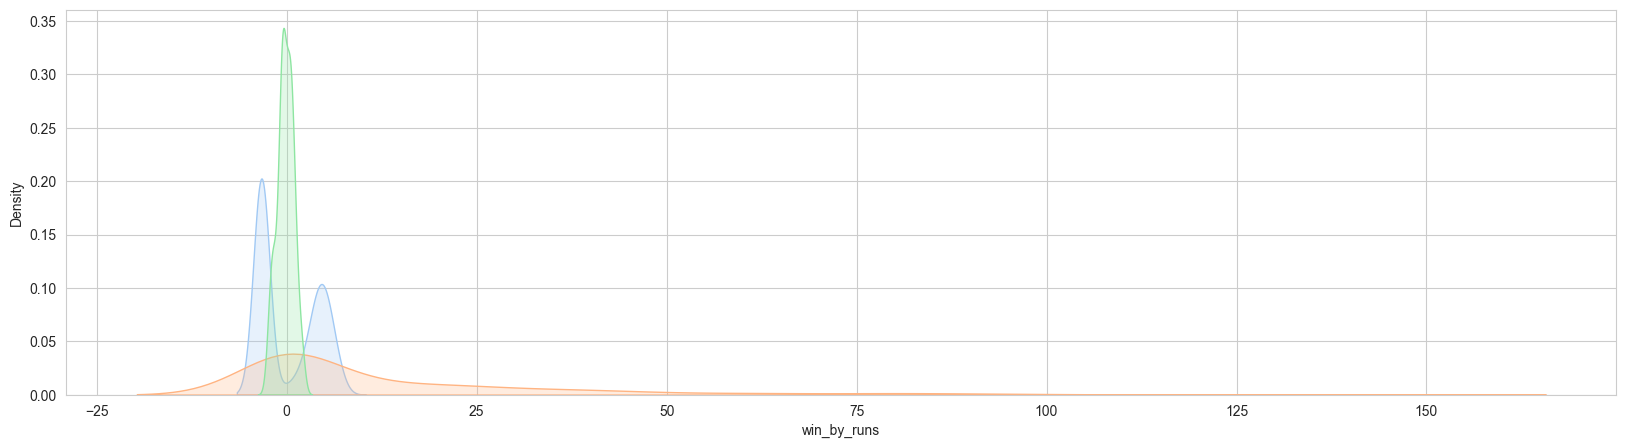

In [64]:
plt.figure(figsize=(20,5))
sns.kdeplot(new_data,fill =True)
sns.kdeplot(ipl_data["win_by_runs"],fill=True)
sns.kdeplot(normalpoints,fill=True)

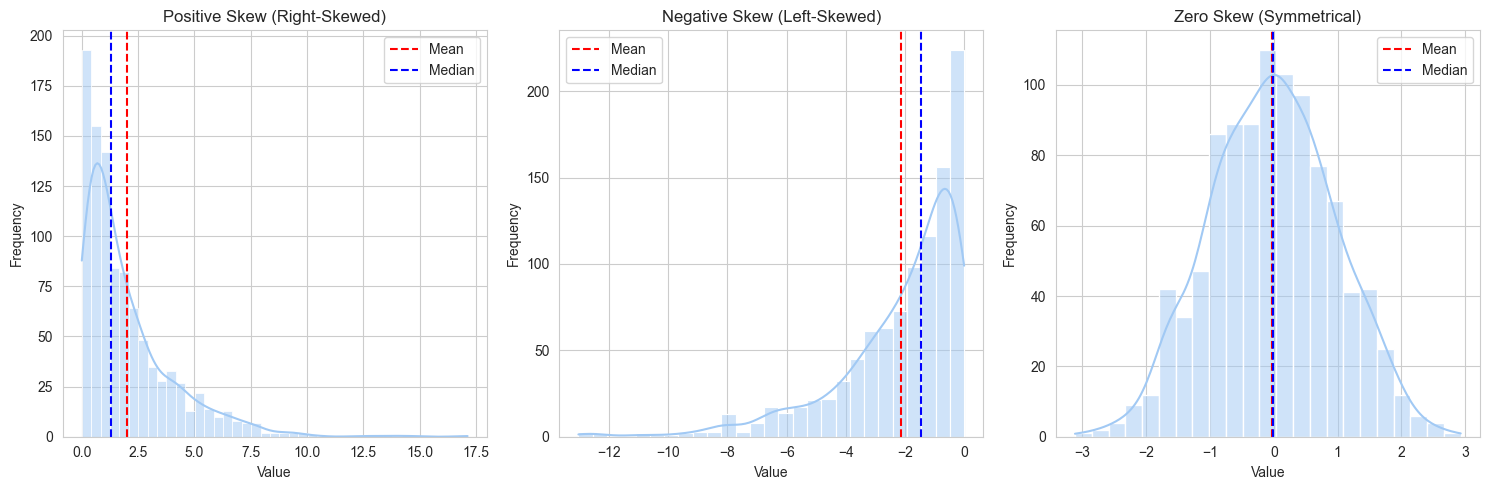

In [71]:
np.random.seed(0)
data_positive_skew = np.random.exponential(scale=2, size=1000)
data_negative_skew = -np.random.exponential(scale=2, size=1000)
data_zero_skew = np.random.normal(loc=0, scale=1, size=1000)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data_positive_skew, kde=True, ax=axes[0])
axes[0].axvline(np.mean(data_positive_skew), color='r', linestyle='--', label='Mean')  
axes[0].axvline(np.median(data_positive_skew), color='b', linestyle='--', label='Median')  
axes[0].set_title("Positive Skew (Right-Skewed)")

sns.histplot(data_negative_skew, kde=True, ax=axes[1])
axes[1].axvline(np.mean(data_negative_skew), color='r', linestyle='--', label='Mean')
axes[1].axvline(np.median(data_negative_skew), color='b', linestyle='--', label='Median')
axes[1].set_title("Negative Skew (Left-Skewed)")

sns.histplot(data_zero_skew, kde=True, ax=axes[2])
axes[2].axvline(np.mean(data_zero_skew), color='r', linestyle='--', label='Mean')
axes[2].axvline(np.median(data_zero_skew), color='b', linestyle='--', label='Median')
axes[2].set_title("Zero Skew (Symmetrical)")

for ax in axes:
    ax.legend()
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


### This plot successfully shows how mean,median and mode varies for left skewed ,right skewed and symmetrical data 